In [1]:
#using Pkg

In [2]:
#Pkg.add(url="https://github.com/trappmartin/DeepStructuredMixtures")

In [3]:
#Pkg.add("Plots")

In [143]:
using Plots
using DeepStructuredMixtures
using Random

In [240]:
xtrain = collect(range(0, stop=1, length = 100))
ytrain = sin.(xtrain*4*pi + randn(100)*0.2);

In [241]:
kernelf = IsoSE(0.1, 1.0)
meanf = ConstMean(mean(xtrain));

In [242]:
# fit a full GP, and fix hyperparameters, so that we can compare the models
modGP = GaussianProcess(Xtrain, ytrain, mean = meanf, kernel = kernelf, logNoise=log(.1))
train!(modGP);

┌ Info: Early stopping at iteration 396 with δ: 0.09281793248968029
└ @ DeepStructuredMixtures /home/manuel/.julia/packages/DeepStructuredMixtures/9lolI/src/optimisers.jl:126


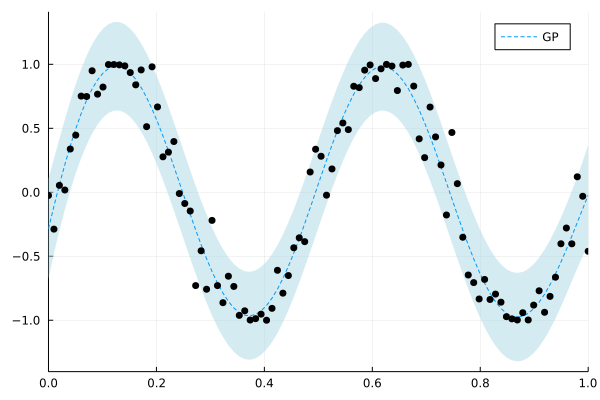

In [243]:
plot(modGP)

In [244]:
# take kernel and noise hyperparameters from full GP
kernOpt = modGP.kernel
lognoiseOpt = modGP.logNoise.value;

In [444]:
# run example from github page of deep structured mixtures (with fixed optimal hyperparameters)

K = 4 # Number of splits per product node
V = 3 # Number of children per sum node
M = 20 # Minimum number of observations per expert

model = buildDSMGP(reshape(xtrain,:,1), ytrain, V, K; M = M, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt)
#train!(model, ADAM())

# finally we perfom exact posterior infence
update!(model)

-7.8683975956893

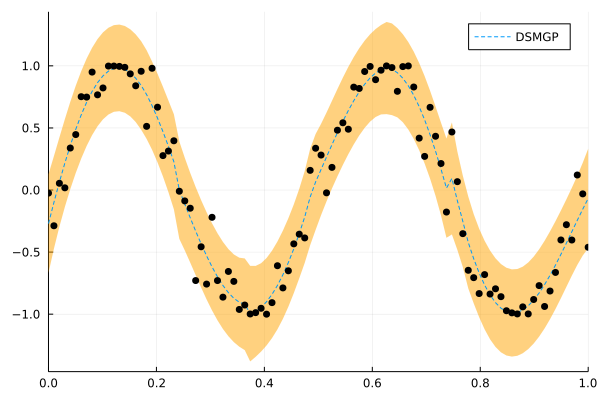

In [445]:
plot(model)

In [446]:
xtest = collect(range(-0.1, stop=1.1, length = 500))
m, s = predict(model, reshape(xtest,:,1));

In [447]:
#v = s#+exp(lognoiseOpt)^2 *ones(length(s));

In [448]:
CSV.write("ms_deepStructMix.csv",  Tables.table(hcat(m,s,xtest)), writeheader=false)

"ms_deepStructMix.csv"

In [449]:
CSV.write("ms_deepStructMix_trainingYX.csv",  Tables.table(hcat(ytrain,xtrain)), writeheader=false)

"ms_deepStructMix_trainingYX.csv"

In [450]:
CSV.write("ms_deepStructMix_hypers.csv",  Tables.table(hcat(exp(kernOpt.logσ), exp(kernOpt.logℓ), exp(lognoiseOpt))), writeheader=false)

"ms_deepStructMix_hypers.csv"

In [451]:
# should be also full GP
model0 = buildDSMGP(Xtrain, ytrain, 2, 2; M = 100, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

In [452]:
m0, s0 = predict(model0, reshape(xtest,:,1));
#v0 = s# *+exp(lognoiseOpt)^2 *ones(length(s0));

In [453]:
CSV.write("ms_deepStructMix_full00.csv",  Tables.table(hcat(m0,s0,xtest)), writeheader=false)

"ms_deepStructMix_full00.csv"

In [24]:
xtrain = collect(range(0, stop=1, length = 100))
#xtrain = vcat( collect(range(0, stop=0.4, length = 50)),  collect(range(0.6, stop=1, length = 50)) )
#xtrain = vcat( collect(range(0, stop=0.3, length = 33)), collect(range(0.4, stop=0.6, length = 33)), collect(range(0.7, stop=1, length = 34)) )
ytrain = sin.(xtrain*4*pi + randn(100)*0.2);

In [25]:
Xtrain = reshape(xtrain,:,1);

In [54]:
#kernelf = IsoSE(log(0.1), log(1.0))
kernelf = IsoSE(0.1, 0.1)
meanf = ConstMean(mean(xtrain));

In [55]:
# An exact Gaussian process
modGP = GaussianProcess(Xtrain, ytrain, mean = meanf, kernel = kernelf, logNoise=log(.1))

Gaussian process
 noise: 0.010000000000000004
 kernel: IsoSE{Float64}(0.1, 0.1, 0.0, 0.0)
 mean: ConstMean{Float64}(0.5)
 mll:Inf

In [56]:
train!(modGP)

┌ Info: Early stopping at iteration 623 with δ: 0.0946382585483505
└ @ DeepStructuredMixtures /home/manuel/.julia/packages/DeepStructuredMixtures/9lolI/src/optimisers.jl:126


(GP(IsoSE{Float64}(-1.8232358108239781, 0.3472888709513674, -0.0914371774360827, -2.9473192214909183), ConstMean{Float64}(0.5)), [-117.10550107143062, -116.91437812147062, -116.72374334945357, -116.53359812171043, -116.34394380283582, -116.15478175398809, -115.9661133311123, -115.77793988308142, -115.59026274976168, -115.4030832599968  …  33.793396744882656, 33.82117053887444, 33.848117505116534, 33.872820636195186, 33.89548402718448, 33.917208752299544, 33.936648915429444, 33.95411110160494, 33.970507820178895, 33.9845789298557])

In [57]:
modGP

Gaussian process
 noise: 0.01817094614186459
 kernel: IsoSE{Float64}(-1.8232358108239781, 0.3472888709513674, -0.0914371774360827, -2.9473192214909183)
 mean: ConstMean{Float64}(0.5)
 mll:33.9845789298557

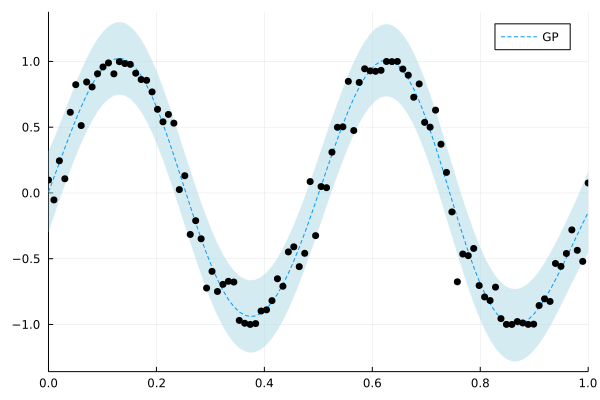

In [58]:
plot(modGP)

In [59]:
kernOpt = modGP.kernel

IsoSE{Float64}(-1.8232358108239781, 0.3472888709513674, -0.0914371774360827, -2.9473192214909183)

In [60]:
lognoiseOpt = modGP.logNoise.value

-2.003965663140307

In [61]:
# should be also full GP
model0 = buildDSMGP(Xtrain, ytrain, 2, 2; M = 100, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

In [62]:
K = 4 #Number of children under each sum node            # Number of splits per product node
V = 3 #Number of splits at each split node               # Number of children per sum node
M =  10 #10 # Minimum number of observations per expert

10

In [63]:
model = buildDSMGP(Xtrain, ytrain, K, V; M = M, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

In [64]:
leftGP(model.root)

Gaussian process
 noise: 0.01817094614186459
 kernel: IsoSE{Float64}(-1.8232358108239781, 0.3472888709513674, -0.0914371774360827, -2.9473192214909183)
 mean: ConstMean{Float64}(0.5)
 mll:-0.7267423144991625

In [65]:
#train!(model, ADAM())
#leftGP(model.root)

In [66]:
# finally we perfom exact posterior infence
update!(model)

14.631660238240183

In [67]:
leftGP(model.root)

Gaussian process
 noise: 0.01817094614186459
 kernel: IsoSE{Float64}(-1.8232358108239781, 0.3472888709513674, -0.0914371774360827, -2.9473192214909183)
 mean: ConstMean{Float64}(0.5)
 mll:-0.7267423144991625

In [68]:
model

DSMGP{Float64}(GPSumNode(##sum#397), [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], DeepStructuredMixtures.BiDict(Dict(Symbol("##GP#479") => 47, Symbol("##GP#472") => 43, Symbol("##GP#569") => 100, Symbol("##GP#421") => 14, Symbol("##GP#521") => 71, Symbol("##GP#517") => 69, Symbol("##GP#592") => 114, Symbol("##GP#552") => 89, Symbol("##GP#406") => 5, Symbol("##GP#431") => 20…), Dict(5 => Symbol("##GP#406"), 56 => Symbol("##GP#494"), 35 => Symbol("##GP#458"), 55 => Symbol("##GP#492"), 110 => Symbol("##GP#585"), 114 => Symbol("##GP#592"), 60 => Symbol("##GP#502"), 30 => Symbol("##GP#451"), 32 => Symbol("##GP#454"), 6 => Symbol("##GP#408")…)))

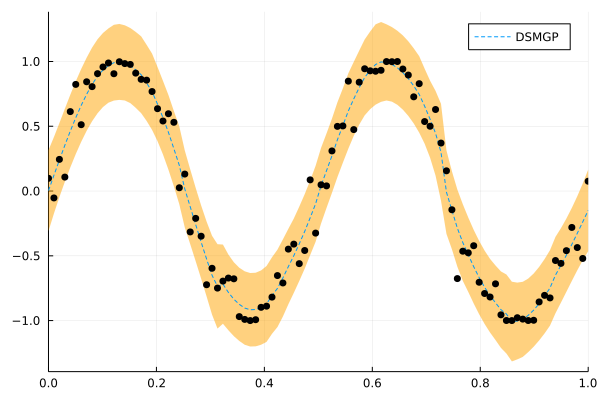

In [69]:
plot(model)

In [1741]:
model.root.children[2]

GPSplitNode(Symbol("##split#9264"), Node[GPSumNode(##sum#9217)], SPNNode[GPSumNode(##sum#9265), GPSumNode(##sum#9278), GPSumNode(##sum#9287), GPSumNode(##sum#9300)], [-Inf], [Inf], [(1, 0.2322793042039738), (1, 0.553697185099415), (1, 0.7744023556222306), (1, Inf)])

In [1742]:
GG = model.root.children[3]

GPSplitNode(Symbol("##split#9313"), Node[GPSumNode(##sum#9217)], SPNNode[GPSumNode(##sum#9314), GPSumNode(##sum#9327), GPSumNode(##sum#9340), GPSumNode(##sum#9354)], [-Inf], [Inf], [(1, 0.20724065771436448), (1, 0.5092021128646513), (1, 0.8636944369855688), (1, Inf)])

In [1743]:
#GGG = GG.children[2]

In [1744]:
#GGG.children[1].nobs

In [1745]:
#model.root.children[2].children[1].children[4].nobs

In [1746]:
 #GG.children[2].children[2].nobs

In [1747]:
model.root

GP Sum Node [##sum#9217] 
 weights: [0.6913474520198266, 0.035247535411512126, 0.06681408897455242, 0.20659092359410916]

In [1757]:
GG = model.root.children[4]

GPSplitNode(Symbol("##split#9363"), Node[GPSumNode(##sum#9217)], SPNNode[GPSumNode(##sum#9364), GPSumNode(##sum#9378), GPSumNode(##sum#9391), GPSumNode(##sum#9404)], [-Inf], [Inf], [(1, 0.2534196323991717), (1, 0.631634105259257), (1, 0.8454382471340607), (1, Inf)])

In [1752]:
GG.split

4-element Vector{Tuple{Int64, Float64}}:
 (1, 0.24658576380685848)
 (1, 0.534654522190013)
 (1, 0.7656250006050715)
 (1, Inf)

In [1754]:
GG.split

4-element Vector{Tuple{Int64, Float64}}:
 (1, 0.2322793042039738)
 (1, 0.553697185099415)
 (1, 0.7744023556222306)
 (1, Inf)

In [1756]:
GG.split

4-element Vector{Tuple{Int64, Float64}}:
 (1, 0.20724065771436448)
 (1, 0.5092021128646513)
 (1, 0.8636944369855688)
 (1, Inf)

In [1758]:
GG.split

4-element Vector{Tuple{Int64, Float64}}:
 (1, 0.2534196323991717)
 (1, 0.631634105259257)
 (1, 0.8454382471340607)
 (1, Inf)

In [1696]:
xtest = collect(range(-0.5, stop=1.5, length = 1000))
Xtest = reshape(xtest,:,1);

In [1697]:
m, s = predict(model, Xtest);
m0, s0 = predict(model0, Xtest);

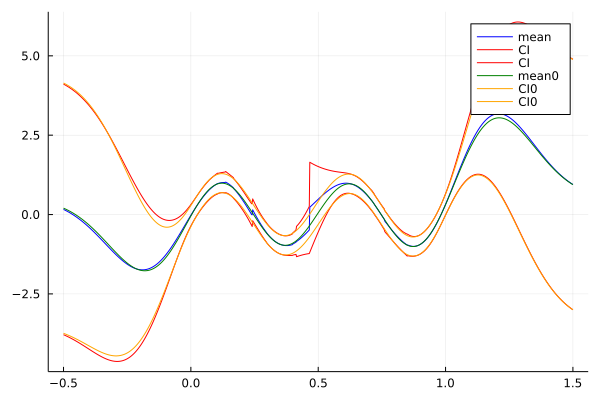

In [1698]:
plot(xtest,m, label="mean", color="blue")
plot!(xtest,m+1.96*sqrt.(s), label="CI", color="red" )
plot!(xtest,m-1.96*sqrt.(s), label="CI", color="red" )


plot!(xtest,m0, label="mean0", color="green")
plot!(xtest,m0+1.96*sqrt.(s0), label="CI0", color="orange")
plot!(xtest,m0-1.96*sqrt.(s0), label="CI0", color="orange")


In [1676]:
# A (generalized) product of experts (PoE) model with K splits per node and a miminum of M observations per expert
modPoE = buildPoE(Xtrain, ytrain, K; generalized = true, M = M, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

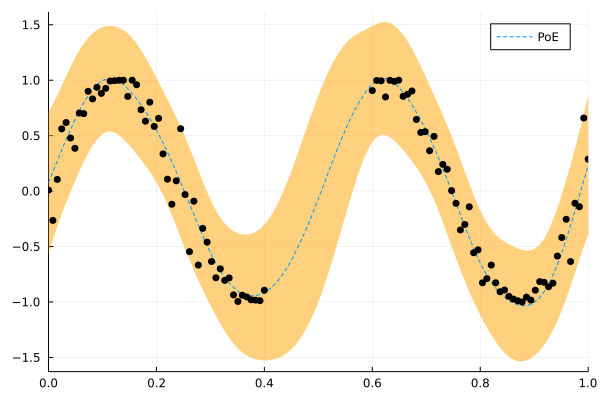

In [1677]:
plot( modPoE )

In [1678]:
modPoE.root.children[1].nobs

LoadError: type GPSplitNode has no field nobs

In [1473]:
# A (robust) Bayesian comittee machine (BCM) model with K splits per node and a miminum of M observations per expert
# ! Training not implemented !
modBCM = buildBCM(Xtrain, ytrain, K; M = M, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

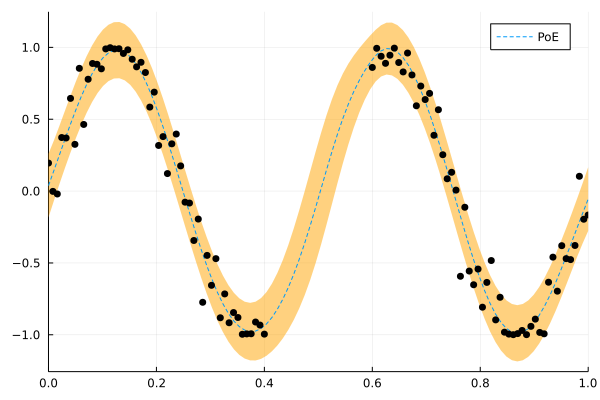

In [1474]:
plot(modBCM)